# TOETS Programmeren en dataverwerking

De opdrachten worden individueel gemaakt en de notebook na afloop inleveren op Canvas. Bij het maken van de opdrachten is het toegestaan de documentatie behorende bij het vak en eerder gemaakte opdrachten te gebruiken. **Het is NIET toegestaan internetbronnen te raadplegen**. Het is toegestaan om de opdrachten in een andere IDE te maken (bv.v Spyder of VSCode). In dat geval moet je als je klaar bent wel alle antwoorden/code in deze notebook zetten en de notebook ingeleveren in Canvas. Er zijn in totaal 7 opdrachten. Het totaal aantal te behalen punten is 100. Je moet minimaal 60 punten scoren voor een voldoende.

---
**Opdracht 1 (10p)**

We willen een punt in het xy-vlak met coordinaten $x$ and $y$ roteren om de oorsprong met een hoek $\theta$. De coordinaten van het geroteerde punt zijn gegeven door:
$$x^{'} = x \cos \theta - y \sin \theta$$
$$y^{'} = x \sin \theta + y \cos \theta$$

Schrijf een functie `rotate(x, y, theta)` die de coordinaten $x^{'}$ en $y^{'}$ berekent volgens bovenstaande uitdrukking en deze "returned".

Bijvoorbeeld een rotatie van het punt ($x=1$, $y=0$) van 45 graden:

`rotate(1, 0, 45)`

geeft als output:

`(0.7071054825112363, 0.7071080798594735)`

In [313]:
import math
# OPDRACHT 1
# =============== YOUR CODE GOES HERE =================
def rotate(x, y, theta):
    rotated_x = x * math.cos(math.radians(theta)) - y * math.sin(math.radians(theta))
    rotated_y = x * math.sin(math.radians(theta)) + y * math.cos(math.radians(theta))
    return (rotated_x, rotated_y)

---
**Opdracht 2 (10p)**

Gegeven zijn de volgende numpy arrays:


```
a : [[ 8, 12, 99,  0,  0,  1],
     [ 4,  2,  2,  2,  3,  1],
     [ 0,  0,  0, 45, 32, 16]]
b : [-1, -1, -1, 5, 6, 7]
```
- Schrijf code die `a` en `b` combineert tot 1 array `c`
```
c : [[ 8, 12, 99,  0,  0,  1],
     [ 4,  2,  2,  2,  3,  1],
     [ 0,  0,  0, 45, 32, 16],
     [-1, -1, -1,  5,  6,  7]]
```
- Schrijf code die met behulp van **slicing** van array `c` een array `d` definieert gelijk aan:
```
d : [[ 2,  2,  2,  3],
     [ 0,  0, 45, 32]]
```

In [11]:
# OPDRACHT 2
# =============== YOUR CODE GOES HERE =================
import numpy as np

a = [[ 8, 12, 99,  0,  0,  1],
     [ 4,  2,  2,  2,  3,  1],
     [ 0,  0,  0, 45, 32, 16]]

b = [-1, -1, -1, 5, 6, 7]
c = np.vstack((a,b))
d = c[1:3, 1:5]


[[ 2  2  2  3]
 [ 0  0 45 32]]


---
**Opdracht 3 (10p)**

De energie niveaus van een quantum deeltje in een 1D potentiaal put met lengte $L$ is gegeven door:
$$ E_n = \frac{n^2h^2}{8mL^2} \quad \text{with } n=1, 2, 3, \cdots $$
In deze uitdrukking is $m$ de massa van het deeltje en $h$ de constante van planck.

Gegeven: 

$m = 9.11\times 10^{-31}$kg

$L = 1\times 10^{-11}$m

$h = 6.626\times 10^{-34}$Js

Schijf een script die met behulp van **list comprehensions** een list definieert met daarin de energie niveaus voor $n=1$ t/m $n=100$. 

In [312]:
# OPDRACHT 3
# =============== YOUR CODE GOES HERE =================
m = 9.11e-31
l = 1.0e-11
h = 6.626e-34

E_n = [(n**2 * h**2)/(8*m*l**2) for n in range(1,101)]

---
**Opdracht 4 (10p)**

Gegeven de datafile `data_toets.csv` (zie canvas). De file bevat data van drie metingen. De vier kolommen zijn:
- kolom 1: x-waarden (pixels) van de data
- kolom 2: y-waarden (intensiteit) van meting 1
- kolom 3: y-waarden (intensiteit) van meting 2
- kolom 4: y-waarden (intensiteit) van meting 3

Schrijf een script die onderstaande figuur reproduceert (lijnen, grid, legend, labels etc.). De rechter subplot plot dezelfde data maar dan per meting genormaliseerd zodat het maximum 1 is.

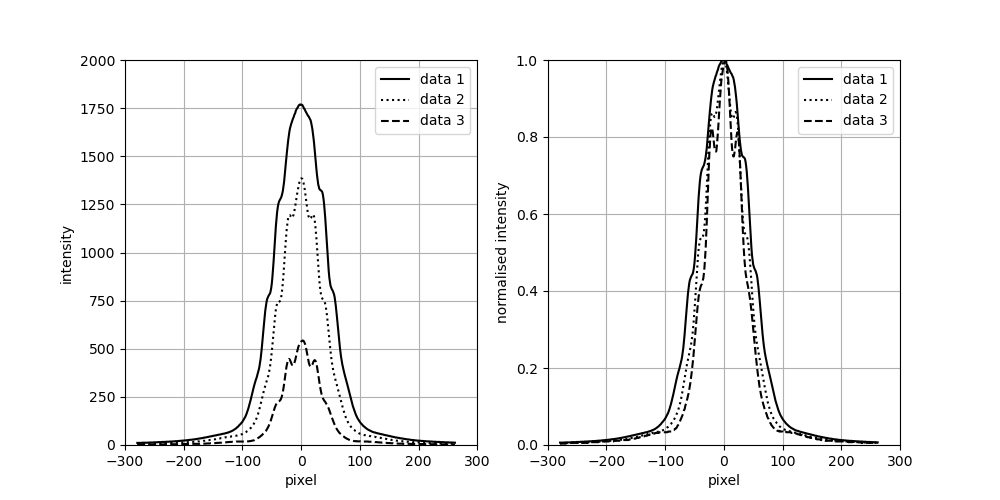

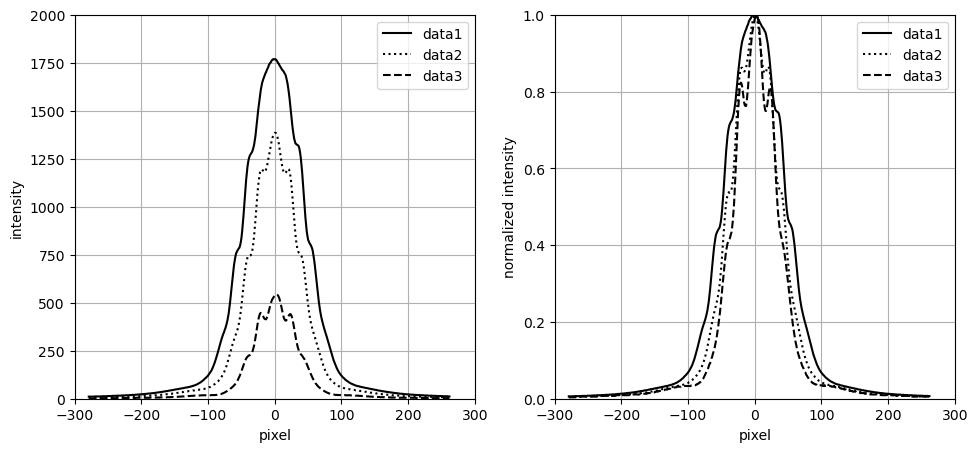

In [220]:
# OPDRACHT 4
# =============== YOUR CODE GOES HERE =================
import numpy as np
import matplotlib.pyplot as plt

filename = 'data_toets_1b.csv'
x, y1, y2, y3 = np.loadtxt(filename, delimiter=',', unpack=True)

fig, axs = plt.subplots(1, 2)
axs[0].plot(x, y1, 'k', label='data1', linestyle ='-')
axs[0].plot(x, y2, 'k', label='data2', linestyle ='dotted')
axs[0].plot(x, y3, 'k', label='data3', linestyle = '--')
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel('pixel')
axs[0].set_ylabel('intensity')
axs[0].set_xlim(-300, 300)
axs[0].set_ylim(0, 2000)

y4, y5, y6 = y1/max(y1), y2/max(y2), y3/max(y3)
axs[1].plot(x, y4, 'k', label='data1', linestyle ='-')
axs[1].plot(x, y5, 'k', label='data2', linestyle ='dotted')
axs[1].plot(x, y6, 'k', label='data3', linestyle = '--')
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel('pixel')
axs[1].set_ylabel('normalized intensity')
axs[1].set_xlim(-300, 300)
axs[1].set_ylim(0, 1)

plt.subplots_adjust(bottom=0.1, right=1.5, top=0.9)


---
**Opdracht 5 (20p)**

Schrijf een functie `compare(x, y)` die gegeven twee lists `x` en `y` bepaalt welke elementen alleen in `x` zitten, welke elementen alleen in `y` zitten en welke elementen in zowel `x` als `y` zitten. De functie "returned" drie lists `only_in_x`, `only_in_y`, en `both_in_xy`.

Voorbeeld:
```python
x = [1, 2, 3, 4, 5]
y = [3, 4, 5, -6, 7]
compare(x, y)
>> ([1, 2], [-6, 7], [3, 4, 5])
```
```python
x = [1, 2, 3, 4, 5]
y = [3, 4, 5]
compare(x, y)
>> ([1, 2], [], [3, 4, 5])
```
```python
x = [1, 2, 3, 4, 5]
y = []
compare(x, y)
>> ([1, 2, 3, 4, 5], [], [])
```



In [216]:
# OPDRACHT 5
# =============== YOUR CODE GOES HERE =================
x = [1,2,3,4,5]
y = [3,4,5,-6,7]

def compare(x,y):
     only_in_x = [x for x in x if x not in y]
     only_in_y = [y for y in y if y not in x]
     both_in_xy = [y for y in y if y in x]
     return only_in_y, only_in_x, both_in_xy

compare(x, y)
     


([-6, 7], [1, 2], [3, 4, 5])

---
**Opdracht 6 (20p)**
De driehoek van Pascal.

Schrijf een script die de 25-ste rij van de driehoek van Pascal berekent. Let op: het is niet toegestaan de formule's van de biomiale verdeling te gebruiken!

De eerste 5 rijen van de driehoek van Pascal zijn hieronder te zien.
```python
        1
      1   1
    1   2   1 
  1   3   3   1
1   4   6   4   1
```

In de driehoek van Pascal wordt de volgende rij telkens als volgt berekent uit de vorige rij:

- bepaal telkens de som van twee naast elkaar gelegen cijfers van de vorige rij en voeg die toe aan de volgende rij.
- voeg een 1 toe aan het begin en voeg een 1 toe aan het eind.

Bijvoorbeeld voor het bepalen van de 4-de rij. De vorige (3de) rij is `1 2 1`. De sommen van naastgelegen elementen uit de 3de rij geeft `1+2 2+1` geeft  `3 3`. Het toevoegen van een 1 aan het begin en een 1 aan het eind geeft tenslotte de 4-de rij: `1  3  3  1`

In [223]:
# OPDRACHT 6
# =============== YOUR CODE GOES HERE =================
def triangle_of_pascal(z):
    row = [1]
    count = 1
    while count < z:
        empty = [1]
        for i in range(len(row) - 1):
            sum = row[i] + row[i + 1]
            empty.append(sum)
        empty.append(1)
        row = empty
        count += 1
    return row

triangle_of_pascal(100000)
     


[1,
 24,
 276,
 2024,
 10626,
 42504,
 134596,
 346104,
 735471,
 1307504,
 1961256,
 2496144,
 2704156,
 2496144,
 1961256,
 1307504,
 735471,
 346104,
 134596,
 42504,
 10626,
 2024,
 276,
 24,
 1]

---
**Opdracht 7 (20p)**

Schrijf een functie `gnomesort(x)` die het *gnome sort* algoritme gebruikt om list `x` te sorteren van klein naar groot.

Gnome sort is vernoemd naar een tuinkabouter die zijn bloempotten sorteert. Een tuinkabouter sorteert de bloempotten volgens de volgende methode:

1. De kabouter gaat voor de eerste meest linker bloempot staan
2. Als er geen bloempot links van hem staat (hij staat aan het begin van de rij met potten), zet hij een stap naar rechts.
3. Als er geen bloempot rechts van hem staat (hij staat aan het einde van de rij met potten), is hij klaar met sorteren. 
4. Hij bekijkt de bloempot voor hem en degene links van hem. Als ze in de juiste volgorde staan, zet hij één stap naar rechts. Als dit niet het geval is, wisselt hij de potten om en doet hij één stap naar links
5. Ga naar stap 2

Zie ook onderstaande figuur voor een illustratie van een aantal stappen in het sorteer algoritme.

Let op: je code moet het gnome sort algoritme gebruiken. Andere sorteer algoritmen worden niet beschouwd als een correct antwoord op de opdracht.

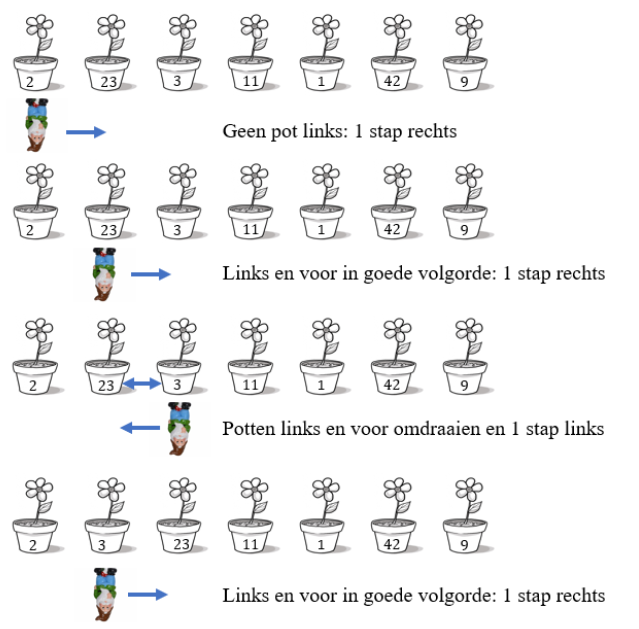

In [3]:
# OPDRACHT 7
# =============== YOUR CODE GOES HERE =================
arr = [21, 12, 43, 54, 2, 3, 7, 0, 12]
def gnomeSort(arr):
     j = 0
     while j < len(arr):
         j += 1
         for i in range(len(arr)-1):
              # print(arr, i, arr[i])
              if arr[i + 1] < arr[i]:
                   arr[i + 1], arr[i] = arr[i], arr[i + 1]
                   i -= 1
              else: 
                   i += 1
     return arr
print(gnomeSort(arr))


[21, 43, 54, 12, 12, 3, 7, 2, 0]
